# Calculating the stable age distribution of WESE
  
### The problem we are trying to solve: 
  
Recall that we used ground counts to "ground truth" the satellite counts. That is, we estimated how many seals were missed by the citizen scientists doing the counts in images from the satellites. We did so by comparing their counts in images within 3 days of ground counts in 9 haul-out locations in Erebus Bay. However, there is an additional complication to this correction.  

We know that the citizen scientists count seals of all ages. For now we set aside the problem of differentiating between males and females, and assume (assumption 1, A1) that all the seals counted are females. We follow Rotella et al. (2019) to consider that each seal counted belongs to one of four categories of breeding status and age: pre-breeders, first-time breeders, experienced breeders, or skip-breeders (PB/FB/EB/SB respectively - see the reference for definitions). We know that the composition of individuals among these age/breeding status classes varies among haul-out locations around Erebus Bay, and assume (A2) this differential distribution of individuals among locations to be true also outside of Erebus Bay.  
  
We also know (from Paterson et al. 2018) that the probability of individuals to show up at a haul-out location during the pupping season depends on their age/status. So, the additional problem is that this differential age/status distribution in Erebus Bay vs other locations is probably an important bias in our correction method. If the locations at Erebus Bay have mostly lactating females, attendance rates from all classes combined will be certainly lower than if they were the age/status distribution counted by the citizen scientist, because at Erebus Bay we are missing most of the pre-breeders in the ground counts. These are seals that prefer to stay away in peripheral locations until recruited into the breeding population. If the ground counts occurred at locations encompassing an area large enough to include all the age/status classes of the "true" Erebus Bay population, we would be counting 100% of the individuals in the ground counts (minus those few missed because they were in the water at the time of the count, but then these would be missed by the satellite cameras too). This hypothetical count of a sufficietly large area to include the whole population would be much more resembling the populations counted by the citizen scientists, and would result in a more appropriate "ground truthing".  
  
To find a better value for the ground counts to correct the satelite-based counts, we make two more assumptions. First (A3), we assume that at sufficiently large scales (global or large regional) the aggregate of seals will resemble closely the stable age distribution for the species. Second (A4), the vital rates reported in Rotella et al. (2012) are representative of these global or large-scale populations and therefore can be used to calculate the stable age distribution. 
  
With the above assumptions we can estimate what would be the age/status distribution of the 9 Erebus Bay locations if these were at the stable age distribution. Thanks to Paterson et al (2018) we also know what is the attendance rate per age/status group at these locations, so we can then estimate what percentage of individuals we are missing from the Erebus Bay ground count due to the fact that we are not ground-counting the entire population. Knowing this percentage of "missing" individuals across all age classes, we can use it to correct the ground counts and thus, the satellite counts in a manner that is more adequate for the global or large regional populations.  
  
  
### Rationale about the breeding status classes  
  
Following Rotella et al. (2012), pre-breeders at any age class come only from the surviving pre-breeders of the previous age class. Thus we make one more assumption (A5), that individuals permanently emigrating from the population are presumed dead. That is, we have a closed population. Also from Paterson et al. (2018) we assume that after age 12 there any pre-breeders that have not bred will never breed. They may survive and remain in the population for many years, but without breeding. First-time breeders come from surviving pre-breeders that are recruited into the breeding population, and from nowhere else (closed population). Because of this, it must be true that the first-time breeders at time t must be equal to all experienced breeders at time t+1 that were first-time breeders at t, plus all skippers at time t+1 that were first-time breeders at t, plus all first-breeders at time t that did not survive to age t+1. Experienced breeders come from first-time breeders that survived and reproduced again the next year, experienced breeders that survived and reproduced again the next year, or skip-breeders that survived and resumed breeding. Skip-breeders similarly come from surviving first-time breeders that skip breeding the next year, experienced breeders that survive to and opt to skip breeding the next year, and skip-breeders that survive and skip breeding again. As with first-time breeders, we can check that the numbers conform with the closed population assumption.
  
The above logic is shown in the below equations, with the following conventions:
  * PB = pre-breeder, FB = first-time breeder, EB = experienced breeder, SB = Skip-breeder, D = dead
  * Psurv is the probability of surviving from year t to year t+1
  * Pfb = probability of pre-breeder at time t becoming first-time breeder at time t+1; Pfb_eb = probability of first-breeder at t to become exprienced breeder at time t+1; and so on for Peb_eb, Ps_eb, Pfb_sb, Peb_sb, and Psb_sb.

So:  
    PB_t+1 = PB_t x Psurv x (1 - Pfb)  
    FB_t+1 = PB_t x Psurv x Pfb  
    EB_t+1 = Psurv x ((FB_t x Pfb_eb) + (EB_t x Peb_eb) + (SB_t x Psb_eb))  
    SB_t+1 = Psurv x ((FB_t x Pfb_sb) + (EB_t x Peb_sb) + (SB_t x Psb_sb))  
    D_t+1  = (1 - Psurv) x (PB_t-1 + FB_t-1 + EB_t-1 + SB_t-1) 
    
Note: these are simplified equations by factoring out Psurv or (1 - Psurv). In reality, as shown in the code below, we cannot factor out Psurv because it varies with breeding status and age.  
  
  
### Rationale about calculating the stabe age distribution and the correction factor for Erebus Bay ground counts
  
We start with 1,000 individuals as pre-breeders at Age 1 (yearlings) and walk them through the above equations, using the appropriate breeding status transition probabilities from Rotella et al. (2012), Table S2, and survival probabilities from Rotella et al. (2012) for pre-breeders, and Paterson et al. (2018), the more recent estimates, for all other categories. We use the quadratic approximation in Paterson et al (2018) for first-time breeders ages 6 and on, and for experienced and skip breeders. We then re-scale the results into proportions of the 1,000 individuals. This gives us the stable age distribution and we partition the ground counts as if these were from a stable age distribution. We then use the attendance rates in Paterson et al. (2018) to calculate how many individuals would be missing from each age/status class in the Erebus Bay ground counts. The difference (as a percentage) is the correction to use for the ground counts. Since this is a multiplicative factor, and the correction from "truthing" with ground counts is also a multiplicative factor, we can add this correction at the end, after calculating a population number.

#### References:
Rotella, J.J., Link, W.A., Chambert, T., Stauffer, G.E. and Garrott, R.A., 2012. Evaluating the demographic buffering hypothesis with vital rates estimated for Weddell seals from 30 years of mark–recapture data. Journal of Animal Ecology, 81(1), pp.162-173.  
Paterson, J.T., Rotella, J.J., Link, W.A. and Garrott, R., 2018. Variation in the vital rates of an Antarctic marine predator: the role of individual heterogeneity. Ecology, 99(10), pp.2385-2396.

### Missing still - how to handle the count of (and missing to count) males

In [103]:
## Functions
getTransitionProbs<-function(age_t,status_t){# returns a vector: to FB, to EB, to SB 
    # we state pobabilities at age t (hence status_t) to calculate transition to some other state at t+1 
    # All data for PB from Rotella et al. 2012, Table S2
    # All coefficients for calculating transitions for all other classes from Paterson et al. 2018
    if(status_t=="PB" & age_t<5){
        toFB<-0; toEB<-0; toSB<-0
    }else if(status_t=="PB" & age_t==5){
        toFB<-0.03053118; toEB<-0; toSB<-0
    }else if(status_t=="PB" & age_t==6){
        toFB<-0.1551194; toEB<-0; toSB<-0
    }else if(status_t=="PB" & age_t==7){
        toFB<-0.284347; toEB<-0; toSB<-0
    }else if(status_t=="PB" & age_t==8){
        toFB<-0.3775407; toEB<-0; toSB<-0
    }else if(status_t=="PB" & age_t==9){
        toFB<-0.3740221; toEB<-0; toSB<-0
    }else if(status_t=="PB" & age_t==10){
        toFB<-0.4528902; toEB<-0; toSB<-0
    }else if(status_t=="PB" & (age_t %in% c(11,12))){
        toFB<-0.3509195; toEB<-0; toSB<-0
    }else if(status_t=="PB" & age_t>12){
        toFB<-0; toEB<-0; toSB<-0
    }else if(status_t != "PB"){
        brP<-breedingProbs(age_t=age_t,status_t=status_t)
        toFB<-0; toEB<-brP$toEB; toSB<-brP$toSB
    }else{ #status_t is unknown? 
        toFB<-0; toEB<-0; toSB<-0
    }
    return(list(toFB=toFB,toEB=toEB,toSB=toSB))
}
        

logit = function(x){log(x/(1 - x))}
ilogit = function(x){1/(1 + exp(-x))}

## This function is called by function getTransition Probs above
breedingProbs = function(age_t, status_t, age.at.first = 7){ 
    ## omitting individual and year random effects
    age.at.first.piece = -0.23 * (age.at.first - 7) /2
    age.piece = -0.36 * ((age_t - 16)/6.77)^2 + -0.08 * (age_t - 16)/6.77
    
    breeder.this.year = ilogit(1.325 + age.piece + age.at.first.piece)
    first.time.breeder.this.year = ilogit(0.895 + age.piece + age.at.first.piece)
    logit.skip.seen.this.year = 1.735 + age.piece + age.at.first.piece
    logit.skip.gone.this.year = 1.516 + age.piece + age.at.first.piece
    skip.this.year = ilogit((logit.skip.seen.this.year + logit.skip.gone.this.year)/2) 

    if(status_t=="FB"){
        toEB <- first.time.breeder.this.year; toSB <- 1-first.time.breeder.this.year
    }else if(status_t=="EB"){
        toEB <- breeder.this.year; toSB <- 1-breeder.this.year
    }else if(status_t=="SB"){
        toEB <- skip.this.year; toSB <- 1-skip.this.year
    }else{
        toEB<-0; toSB<-0
    }
    
    return(list(toEB=toEB, toSB=toSB))
}
  

getSurvivalProb<-function(age_t,status_t){  # This returns the probability of surviving to age t+1 (i.e., from t to t+1)
    # Data to use to calculate breeding probabilities for recruited females from Paterson et al. 2018
    # Or from Rotella et al. 2012 where indicated
    if(age_t==1){ # From Rotella et al. 2012 Table S2
        Psurv<-0.4930005
    }
    if(age_t>=2){ # From Rotella et al. 2012 Table S2
        Psurv<-0.9323903
        if(status_t != "PB"){
            Psurv<-survivalProb(age_t=age_t,status_t=status_t)
        }else if(status_t=="PB" & age_t>12){
            # Some pre-breeders never breed and linger in the popuation, with Psurv equal to the general estimate
            # From Rotella et al. 2012 Table S2
            Psurv<-0.9323903
        }
    }
    return(Psurv)
}

survivalProb = function(age_t,status_t){
    ## Omitting individual and year random effects  
    ## omitting age at first reproduction effect, as it is nearly 0

    age.piece = -0.15 * ((age_t - 16)/6.77)^2 + -0.48 * (age_t - 16)/6.77

    breeder.this.year = ilogit(1.992 + age.piece)
    first.time.breeder.this.year = ilogit(2.081 + age.piece)
    skip.this.year = ilogit(2.442 + age.piece)

    Psurv<-ifelse(status_t=="FB",first.time.breeder.this.year, ifelse(status_t=="EB",breeder.this.year,skip.this.year))
    
    return(Psurv)
}


calcNextYear<-function(Mx_row_t){
    
    age_t<-Mx_row_t[1] 
    PB_t<-Mx_row_t[2]; FB_t<-Mx_row_t[3]; EB_t<-Mx_row_t[4]; SB_t<-Mx_row_t[5]
    DPB_t<-Mx_row_t[6]; DFB_t<-Mx_row_t[7]; DEB_t<-Mx_row_t[8]; DSB_t<-Mx_row_t[9]
    
    # calculate PB numbers at age t+1, dead PB at age t+1
    PsurvPB<-getSurvivalProb(age_t=age_t, status_t="PB")
    transProbPB<-getTransitionProbs(age_t=age_t,status_t="PB")
    ProbPBPB<- 1-transProbPB$toFB  #i.e., PB not turning to FB
    PB_tp1 <- PB_t * PsurvPB * ProbPBPB  
    DPB_tp1 <- PB_t * (1-PsurvPB)
    
    # calculate FB numbers at age t+1
    FB_tp1 <- PB_t * PsurvPB * transProbPB$toFB
    # calculate dead FB at age t+1: It's not 0; it should be those that did not become EB or SB, so... 
    PsurvFB<-getSurvivalProb(age_t=age_t, status_t="FB")
    DFB_tp1<- FB_t * (1-PsurvFB)  
    
    # calculate EB numbers at age t+1
    PsurvFB<-getSurvivalProb(age_t=age_t, status_t="FB")
    PsurvEB<-getSurvivalProb(age_t=age_t, status_t="EB")
    PsurvSB<-getSurvivalProb(age_t=age_t, status_t="SB")
    transProbFB<-getTransitionProbs(age_t=age_t,status_t="FB"); Pfb_eb<-transProbFB$toEB
    transProbEB<-getTransitionProbs(age_t=age_t,status_t="EB"); Peb_eb<-transProbFB$toEB
    transProbSB<-getTransitionProbs(age_t=age_t,status_t="SB"); Psb_eb<-transProbFB$toEB
    EB_tp1 <- (FB_t * PsurvFB * Pfb_eb) + (EB_t * PsurvEB * Peb_eb) + (SB_t * PsurvSB * Psb_eb)
    # calculate dead EB at age t+1 
    DEB_tp1 <- EB_t * (1-PsurvEB)
    
    # calculate SB numbers at age t+1
    Pfb_sb<-transProbFB$toSB
    Peb_sb<-transProbFB$toSB
    Psb_sb<-transProbFB$toSB
    SB_tp1 <- (FB_t * PsurvFB * Pfb_sb) + (EB_t * PsurvEB * Peb_sb) + (SB_t * PsurvSB * Psb_sb)
    # calculate dead SB at age t+1
    DSB_tp1 <- SB_t * (1-PsurvSB)
    
    #return Mx_row_tp1 - i.e., the row of values at age tp1, i.e., "the next row"
    age_tp1<-age_t+1
    Mx_row_tp1<-c(age_tp1,PB_tp1,FB_tp1,EB_tp1,SB_tp1,DPB_tp1,DFB_tp1,DEB_tp1,DSB_tp1)
    return(Mx_row_tp1)
}


In [188]:
## Dimension starting matrix, seed with 15,335 PB seals, as this results in 100,000 individuals in the population
## Loop through 29 age class transitions and update the appropriate row in the matrix.
WESEmx<-matrix(rep(0,times=30*9),ncol=9)
WESEmx[,1]<-c(1:30)
WESEmx[1,]<-c(1,15335,0,0,0,0,0,0,0)

for(rr in 1:29){
    Mx_row_tp1<-calcNextYear(WESEmx[rr,])
    WESEmx[rr+1,]<-round(Mx_row_tp1)
}
wesedf<-as.data.frame(WESEmx);names(wesedf)<-c("age","PB","FB","EB","SB","DPB","DFB","DEB","DSB")
wesedf$Alive<-apply(wesedf[,2:5],1,sum)
wesedf$CumDead<-sapply(1:30,function(dd,wesedf){
    cnd<-numeric()
    for(rr in 1:dd){
        cdv<-sum(wesedf[rr,6:9])
        cnd<-c(cnd,cdv)
    }
    return(sum(cnd))
},wesedf=wesedf)
wesedf$Balance<-wesedf$Alive+wesedf$CumDead
print(wesedf)

   age    PB   FB   EB   SB  DPB DFB DEB DSB Alive CumDead Balance
1    1 15335    0    0    0    0   0   0   0 15335       0   15335
2    2  7560    0    0    0 7775   0   0   0  7560    7775   15335
3    3  7049    0    0    0  511   0   0   0  7049    8286   15335
4    4  6572    0    0    0  477   0   0   0  6572    8763   15335
5    5  6128    0    0    0  444   0   0   0  6128    9207   15335
6    6  5539  174    0    0  414   0   0   0  5713    9621   15334
7    7  4363  801   89   71  374  14   0   0  5324   10009   15333
8    8  2911 1157  523  363  295  63   8   4  4954   10379   15333
9    9  1689 1025 1167  717  197  93  46  21  4598   10736   15334
10  10   986  589 1726  954  114  84 104  42  4255   11080   15335
11  11   503  416 1997 1008   67  50 157  57  3924   11411   15335
12  12   304  165 2134 1000   34  36 188  63  3603   11732   15335
13  13   184   99 2088  923   21  15 208  65  3294   12041   15335
14  14   172    0 1985  840   12   9 213  62  2997   12337   1

In [189]:
#Checking: Percent seals > 20 yrs old
(sum(wesedf$EB[21:30]) + sum(wesedf$SB[21:30]))/sum(wesedf$Alive)

[1] 0.05446054

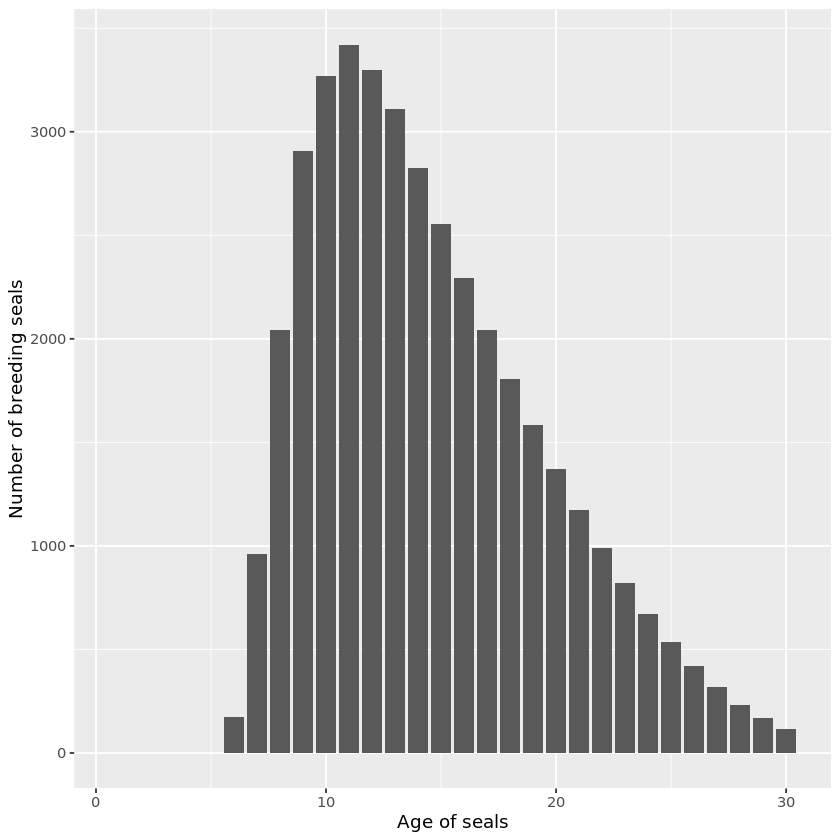

In [190]:
#Checking: number of breeding seals by age 
wesedf$numRecruited<-apply(wesedf[,c("FB","EB","SB")],1,sum)
library(ggplot2)
ggplot(wesedf,aes(age,numRecruited)) + geom_bar(stat="identity") + labs(x="Age of seals", y="Number of breeding seals")

## Correcting the Erebus Bay ground counts for incomplete survey of the stable age abundances
Now that we know what percentage of individuals should be expected in each age class (under the assumption that the vital rates from Erebus Bay are representative of those elsewhere in the continent), we need to know the true percentage in age classes in the ground counts, or alternatively, the colony attenance rates per age class. Per JR, all recruitment to the population happens at the Erebus Bay locations, so the attendance rate of FB seals is 100%. The same is the case for EB seals. That is, if the seal is not breeding at the Erebus Bay locations, it is not breeding elsewhere. From inspecting peripheral haul-out sites, JR and his team know that there is a good percentage of missing PB seals. Also a very small percentage of EB may choose to skip breeding away from the Erebus Bay locations. A larger number of FB may skip attendance to the Erebus Bay locations and skip breeding in any year by going to some other location: 16% per Paterson et al. 2018.  
  
Stauffer et al. 2013, Supplemental material, Figure S2 panel b, shows that the precent of pre-breeders skipping attendance at Erebus Bay locations varies throughout the season. An average value is 65% attendance. Paterson et al. 2018 report an attendance rate of 96% for SB, and 84% for FB that skip.  
  
We use these percentages below to estimate the number of individuals missed in the ground counts because they were not at the haul out locations in Erebus Bay in 2011.

In [191]:
## From the above calculations, we have the following totals per age class:
(countsByClass<-apply(wesedf[,2:5],2,sum))

PB    FB    EB    SB 
60888  4426 23195 11490

In [192]:
## Here are the attendance rates by age class
arPB<-0.65 # From Sauffer et al. 2013, supplemental Figure S2, panel b - value of the curve for survey period 4 (approx. date of our ground counts)
arFB<-1 # All seals recruit in rebus Bay locations
arEB<-1 # All expereinced breeders breed again in Eerebus Bay locations
arFBSB<-0.84
arEBSB<-0.94
arSBSB<-0.96
## To calculate arSB, we compute a weighted average:
arSBall<-c(arFBSB,arEBSB,arSBSB)
arSB<-as.numeric((arSBall %*% countsByClass[2:4])/sum(countsByClass[2:4]))
print(arSB)

[1] 0.9345591


In [193]:
## By stable age distribution the ground counts should find, with perfect detection of all females, as many as...
print(paste("Stable Age count:",sum(countsByClass)))

## Accounting for the attendance rates above, the true number of females available for counting is...
attRates<-c(arPB,arFB,arEB,arSB)
sealsToCount<-round(countsByClass * attRates)
print(paste("Available to count:",sum(sealsToCount)))

[1] "Stable Age count: 99999"
[1] "Available to count: 77936"


In [194]:
## Count inflation ratio is then:
(round(sum(countsByClass)/sum(sealsToCount),3))

[1] 1.283

## Dealing with males in the counts
We know that the satellite images captured males on ice. We have the known problem that the Erebus Bay locations will host mostly breeding males; those not breeding will be found in larger numbers in peripheral locations. Breeding males and non-breeding males behave very differently, too. The breeders spend considerable time in the water defending territories and access to receptive females. Thus, the ground count of males at Erebus Bay will probably miss many, whereas this would not be the case if the location was a non-breeding haul-out. So, one piece of the problem is that there is a difference in the ratio of males to females at a haul-out location that makes it so that the Erebus Bay locations have fewer males than they should if the social effects (males competing for access to receptive females) were not at play. The other part is that the territorial males spend a lot more time in the water, and not on ice and available for detection via a atellite image. As a result of these two issues, the percentage of males at Erebus Bay is underrepresented in the ground counts and it is very likely not reflective of the true number of males in the population.  
  
We cannot follow the same approach as we did with the female vital rates, because we don't have the critical transition probabilities (esp. recruitment rates) and the differential probability of being in the water at the time of a ground count, which is also dependent on breeding status. These data do not exist for locations outside of Erebus Bay. A simple approach is to assume that the ratio of males to females in the ground counts at Erebus Bay is the same elsewhere (JR and his team know this not to be true, DA also knows this not to be true from his own experience, but we acknowledge our limitations and the consequences of this very impactful assumption), and then adjust the total estimates for the percent of females in the ground counts, so as to limit our estimates to only females. For this approach, all we need to know is the percent of males on the ground during the ground counts, which JR and his team have estimated at 22.1% (excluding pups).

### Adjusting for stable age distribution and counting only females
All we have left to do is multiply these two adjustment rates and the product will give us the value of the correction factor.

In [133]:
## corrFactor = percent_FemalesInCounts x stableAgeDistribution_correction
(corrFactor<-0.779 * 1.283)

[1] 0.999457

That is, if our global or regional counts using volunteers that tag seals in satellite images say there were 100,000 seals, then 100,000 x 0.999457 = 99,946 of these were female seals.